In [1]:
!pip install streamlit

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix


In [3]:
df = pd.read_csv(r"C:\Users\rajee\Downloads\Heart_Disease_Dataset.csv")

In [4]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100196,No,48.02,No,No,Yes,13,17,No,Female,45-49,White,"No, borderline diabetes",No,Fair,6.4,Yes,No,No
100197,Yes,82.88,No,No,No,29,23,No,Male,75-79,Other,"No, borderline diabetes",Yes,Very good,18.9,Yes,Yes,No
100198,No,39.46,No,Yes,Yes,23,6,Yes,Male,80 or older,Hispanic,Yes,No,Excellent,18.5,Yes,No,Yes
100199,No,46.25,Yes,Yes,Yes,9,14,No,Male,25-29,American Indian/Alaskan Native,No,No,Very good,22.7,Yes,Yes,No


In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes


In [6]:
df.shape

(100201, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100201 entries, 0 to 100200
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      100201 non-null  object 
 1   BMI               100201 non-null  float64
 2   Smoking           100201 non-null  object 
 3   AlcoholDrinking   100201 non-null  object 
 4   Stroke            100201 non-null  object 
 5   PhysicalHealth    100201 non-null  int64  
 6   MentalHealth      100201 non-null  int64  
 7   DiffWalking       100201 non-null  object 
 8   Sex               100201 non-null  object 
 9   AgeCategory       100201 non-null  object 
 10  Race              100201 non-null  object 
 11  Diabetic          100201 non-null  object 
 12  PhysicalActivity  100201 non-null  object 
 13  GenHealth         100201 non-null  object 
 14  SleepTime         100201 non-null  float64
 15  Asthma            100201 non-null  object 
 16  KidneyDisease     10

In [8]:
## For statistical analysis
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,100201.000000,100201.000000,100201.000000,100201.000000
mean,53.373302,14.503937,14.498239,12.490389
std,23.878712,8.640423,8.658639,6.632122
min,12.020000,0.000000,0.000000,1.000000
25%,32.760000,7.000000,7.000000,6.700000
50%,53.380000,14.000000,15.000000,12.500000
75%,73.950000,22.000000,22.000000,18.200000
max,94.850000,29.000000,29.000000,24.000000


In [9]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
100196    False
100197    False
100198    False
100199    False
100200    False
Length: 100201, dtype: bool

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
for column in df.columns:
    print(df[column].value_counts())

HeartDisease
Yes    50134
No     50067
Name: count, dtype: int64
BMI
27.95    26
88.49    26
56.38    26
91.47    26
50.49    25
         ..
64.14     3
47.98     3
25.94     3
91.36     2
34.33     2
Name: count, Length: 8284, dtype: int64
Smoking
Yes    50445
No     49756
Name: count, dtype: int64
AlcoholDrinking
Yes    50435
No     49766
Name: count, dtype: int64
Stroke
Yes    50265
No     49936
Name: count, dtype: int64
PhysicalHealth
8     3430
20    3401
9     3395
16    3392
19    3386
13    3385
12    3377
26    3369
29    3363
15    3355
23    3354
22    3347
28    3345
14    3343
2     3341
1     3337
10    3334
11    3332
6     3329
0     3328
17    3327
7     3323
24    3316
5     3305
18    3301
3     3287
21    3285
27    3277
25    3270
4     3267
Name: count, dtype: int64
MentalHealth
27    3442
16    3442
13    3419
5     3403
26    3397
21    3394
22    3390
7     3382
2     3377
8     3376
1     3374
18    3367
14    3362
28    3361
6     3360
3     3357
20    3342
9

In [13]:
df['Diabetic'].value_counts()

Diabetic
Yes (during pregnancy)     25171
No, borderline diabetes    25077
Yes                        25001
No                         24952
Name: count, dtype: int64

In [14]:
df=pd.get_dummies(df,columns=["Diabetic"],drop_first=True)

In [15]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Fair,17.1,Yes,Yes,Yes,False,True,False
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,Yes,Poor,2.7,Yes,No,No,True,False,False
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,Poor,15.6,Yes,Yes,Yes,False,False,False
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,No,Fair,1.4,No,No,Yes,True,False,False
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,Yes,Excellent,8.8,Yes,Yes,Yes,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100196,No,48.02,No,No,Yes,13,17,No,Female,45-49,White,No,Fair,6.4,Yes,No,No,True,False,False
100197,Yes,82.88,No,No,No,29,23,No,Male,75-79,Other,Yes,Very good,18.9,Yes,Yes,No,True,False,False
100198,No,39.46,No,Yes,Yes,23,6,Yes,Male,80 or older,Hispanic,No,Excellent,18.5,Yes,No,Yes,False,True,False
100199,No,46.25,Yes,Yes,Yes,9,14,No,Male,25-29,American Indian/Alaskan Native,No,Very good,22.7,Yes,Yes,No,False,False,False


In [16]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,Yes,Yes,No,7,6,Yes,Female,25-29,White,Yes,Fair,17.1,Yes,Yes,Yes,False,True,False
1,Yes,36.93,Yes,Yes,No,3,10,No,Female,30-34,Hispanic,Yes,Poor,2.7,Yes,No,No,True,False,False
2,No,18.70,Yes,No,Yes,26,15,No,Male,70-74,Hispanic,No,Poor,15.6,Yes,Yes,Yes,False,False,False
3,Yes,31.43,Yes,Yes,Yes,24,20,No,Female,40-44,American Indian/Alaskan Native,No,Fair,1.4,No,No,Yes,True,False,False
4,Yes,75.64,No,No,Yes,2,29,No,Male,35-39,White,Yes,Excellent,8.8,Yes,Yes,Yes,False,False,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100201 entries, 0 to 100200
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease                      100201 non-null  object 
 1   BMI                               100201 non-null  float64
 2   Smoking                           100201 non-null  object 
 3   AlcoholDrinking                   100201 non-null  object 
 4   Stroke                            100201 non-null  object 
 5   PhysicalHealth                    100201 non-null  int64  
 6   MentalHealth                      100201 non-null  int64  
 7   DiffWalking                       100201 non-null  object 
 8   Sex                               100201 non-null  object 
 9   AgeCategory                       100201 non-null  object 
 10  Race                              100201 non-null  object 
 11  PhysicalActivity                  100201 non-null  o

In [18]:
binary_columns = ["Smoking","AlcoholDrinking","Stroke","DiffWalking","PhysicalActivity","Asthma","KidneyDisease","SkinCancer"]
for col in binary_columns:
  df[col] = df[col].map({"Yes":1,"No":0})

In [19]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,1,1,0,7,6,1,Female,25-29,White,1,Fair,17.1,1,1,1,False,True,False
1,Yes,36.93,1,1,0,3,10,0,Female,30-34,Hispanic,1,Poor,2.7,1,0,0,True,False,False
2,No,18.70,1,0,1,26,15,0,Male,70-74,Hispanic,0,Poor,15.6,1,1,1,False,False,False
3,Yes,31.43,1,1,1,24,20,0,Female,40-44,American Indian/Alaskan Native,0,Fair,1.4,0,0,1,True,False,False
4,Yes,75.64,0,0,1,2,29,0,Male,35-39,White,1,Excellent,8.8,1,1,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100196,No,48.02,0,0,1,13,17,0,Female,45-49,White,0,Fair,6.4,1,0,0,True,False,False
100197,Yes,82.88,0,0,0,29,23,0,Male,75-79,Other,1,Very good,18.9,1,1,0,True,False,False
100198,No,39.46,0,1,1,23,6,1,Male,80 or older,Hispanic,0,Excellent,18.5,1,0,1,False,True,False
100199,No,46.25,1,1,1,9,14,0,Male,25-29,American Indian/Alaskan Native,0,Very good,22.7,1,1,0,False,False,False


In [20]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)'],
      dtype='object')

In [21]:
## Applying the get dummies method

data = pd.get_dummies(df,columns=["Sex","AgeCategory","Race","GenHealth"],drop_first=True)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,Yes,14.96,1,1,0,7,6,1,1,17.1,...,False,False,False,False,False,True,True,False,False,False
1,Yes,36.93,1,1,0,3,10,0,1,2.7,...,False,False,False,True,False,False,False,False,True,False
2,No,18.70,1,0,1,26,15,0,0,15.6,...,False,False,False,True,False,False,False,False,True,False
3,Yes,31.43,1,1,1,24,20,0,0,1.4,...,False,False,False,False,False,False,True,False,False,False
4,Yes,75.64,0,0,1,2,29,0,1,8.8,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100196,No,48.02,0,0,1,13,17,0,0,6.4,...,False,False,False,False,False,True,True,False,False,False
100197,Yes,82.88,0,0,0,29,23,0,1,18.9,...,False,False,False,False,True,False,False,False,False,True
100198,No,39.46,0,1,1,23,6,1,0,18.5,...,True,False,False,True,False,False,False,False,False,False
100199,No,46.25,1,1,1,9,14,0,0,22.7,...,False,False,False,False,False,False,False,False,False,True


In [22]:
data.isnull().sum()

HeartDisease                        0
BMI                                 0
Smoking                             0
AlcoholDrinking                     0
Stroke                              0
PhysicalHealth                      0
MentalHealth                        0
DiffWalking                         0
PhysicalActivity                    0
SleepTime                           0
Asthma                              0
KidneyDisease                       0
SkinCancer                          0
Diabetic_No, borderline diabetes    0
Diabetic_Yes                        0
Diabetic_Yes (during pregnancy)     0
Sex_Male                            0
AgeCategory_25-29                   0
AgeCategory_30-34                   0
AgeCategory_35-39                   0
AgeCategory_40-44                   0
AgeCategory_45-49                   0
AgeCategory_50-54                   0
AgeCategory_55-59                   0
AgeCategory_60-64                   0
AgeCategory_65-69                   0
AgeCategory_

In [23]:
## Define the x and target

X=data.drop(columns=["HeartDisease"])
y=data["HeartDisease"].map({"Yes":1,"No":0})

In [24]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,14.96,1,1,0,7,6,1,1,17.1,1,...,False,False,False,False,False,True,True,False,False,False
1,36.93,1,1,0,3,10,0,1,2.7,1,...,False,False,False,True,False,False,False,False,True,False
2,18.70,1,0,1,26,15,0,0,15.6,1,...,False,False,False,True,False,False,False,False,True,False
3,31.43,1,1,1,24,20,0,0,1.4,0,...,False,False,False,False,False,False,True,False,False,False
4,75.64,0,0,1,2,29,0,1,8.8,1,...,False,False,False,False,False,True,False,False,False,False


In [25]:
## Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [26]:
clf = DecisionTreeClassifier(max_depth=5,criterion="gini",random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.50
Precision: 0.50
Recall: 0.51
F1-Score: 0.50
AUC-ROC: 0.50


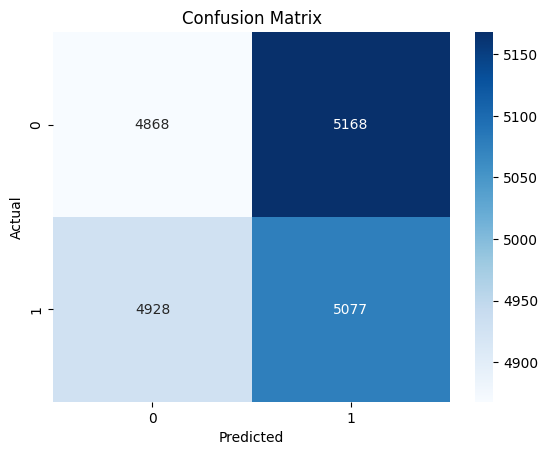

In [28]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()